In [1]:
# !pip install nltk --quiet

In [2]:
import nest_asyncio
import sys
from green_mood_tracker.twint_class import TWINT
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from green_mood_tracker.training_data import get_raw_data_notebook

## download and clean data

In [3]:
raw_data = get_raw_data_notebook()

/Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/green_mood_tracker/training_data.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sentiment140_final['polarity'] = sentiment140_final.polarity.map({4:2,0:0})
/Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/green_mood_tracker/training_data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sentiment140_final['source'] = 'sentiment140'


In [4]:
from green_mood_tracker.data_cleaning import clean
raw_data = get_raw_data_notebook()
raw_data_clean = clean(raw_data,'text')
raw_data_clean.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryhall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,text,polarity,source
0,1467933112,angel going miss athlete weekend,0,sts_gold
1,2323395086,look though shaq getting traded cleveland play...,0,sts_gold
2,1467968979,april th isnt coming soon enough,0,sts_gold
3,1990283756,drinking mcdonalds coffee understanding someon...,0,sts_gold
4,1988884918,dissapointed taylor swift doesnt twitter,0,sts_gold


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633048 entries, 0 to 1599999
Data columns (total 4 columns):
id          1633048 non-null object
text        1633048 non-null object
polarity    1633048 non-null int64
source      1633048 non-null object
dtypes: int64(1), object(3)
memory usage: 62.3+ MB


In [6]:
raw_data_clean_sts_gold = raw_data_clean.query('source==\'sts_gold\'')

In [7]:
raw_data_clean_sts_gold.shape

(2034, 4)

In [8]:
raw_data_clean.source.value_counts()

sentiment140              1600000
kaggle_sentiment_train      27480
kaggle_sentiment_test        3534
sts_gold                     2034
Name: source, dtype: int64

In [9]:
raw_data_clean.polarity.value_counts()

2    810317
0    810184
1     12547
Name: polarity, dtype: int64

In [10]:
raw_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633048 entries, 0 to 1599999
Data columns (total 4 columns):
id          1633048 non-null object
text        1633048 non-null object
polarity    1633048 non-null int64
source      1633048 non-null object
dtypes: int64(1), object(3)
memory usage: 62.3+ MB


In [11]:
data_sample = raw_data_clean.sample(n=10_000,random_state=0).reset_index()
data_sample.head()

,index,id,text,polarity,source
0,89497,1755343696,headed yonkers back later tonight,0,sentiment140
1,212595,1974776713,tried callin past dayz tu e bueno wey,0,sentiment140
2,17473,1556303397,sister give much shit twitter im uncool,0,sentiment140
3,1526772,2177082321,thanks sun shining manchester today,2,sentiment140
4,1481406,2067068036,saw stand lookin good,2,sentiment140


In [12]:
data_sample['text'] = data_sample.text.apply((lambda x: x.split()))

In [13]:
X.iloc[0]

NameError: name 'X' is not defined

In [ ]:
len(X_train_pad[1])

In [14]:
from sklearn.model_selection import train_test_split

X = data_sample.text
y = data_sample.polarity

sentence_train, sentence_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [15]:
y_train.shape

(7000,)

In [16]:
# !pip install tensorflow --quiet

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(sentence_train)
word_to_id = tk.word_index
id_to_word = {value:key for key,value in word_to_id.items()}
sentences_token_train = tk.texts_to_sequences(sentence_train)
sentences_token_test = tk.texts_to_sequences(sentence_test)
tk.word_counts['film']

7

In [18]:
len(word_to_id)

10899

In [19]:
sentences_token_train[0]

[28, 741, 996, 15, 3828, 128, 145, 28, 89, 25]

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def generate_data(X_train,X_test):
    
    # YOUR CODE HERE
    X_train_pad = pad_sequences(X_train,value= 0, dtype = 'float32',padding='post')
    X__test_pad = pad_sequences(X_test,value= 0, dtype = 'float32',padding='post')
    
    return X_train_pad,X__test_pad

X_train_pad, X_test_pad = generate_data(sentences_token_train,sentences_token_test)

In [21]:
sentence_train[1]

['tried', 'callin', 'past', 'dayz', 'tu', 'e', 'bueno', 'wey']

In [22]:
len(id_to_word)

10899

In [23]:
len(sentences_token_train[1000])

8

In [24]:
X_train_pad[0]

array([  28.,  741.,  996.,   15., 3828.,  128.,  145.,   28.,   89.,
         25.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.], dtype=float32)

In [25]:
y_train.value_counts()

0    3554
2    3395
1      51
Name: polarity, dtype: int64

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [28]:
vocab_size

NameError: name 'vocab_size' is not defined

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

vocab_size=len(word_to_id)

def init_model(vocab_size):
    
    # YOUR CODE HERE
    model = Sequential()

    model.add(layers.Masking(mask_value=0.))
    model.add(layers.Embedding(input_dim=vocab_size+1, output_dim=100))
    model.add(layers.LSTM(units=13, activation='tanh')) 
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss= 'categorical_crossentropy', 
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model = init_model(vocab_size)

In [ ]:
# model.build()
model.summary()

In [ ]:
X_train_pad.shape

In [38]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_accuracy')
history = model.fit(X_train_pad, y_train,
          validation_split= 2/7,
          epochs=100, 
          batch_size=16, 
          verbose=1,
          callbacks = [es])

Epoch 1/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4925 - accuracy: 0.8028 - val_loss: 0.7466 - val_accuracy: 0.6750
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.3976 - accuracy: 0.8486 - val_loss: 0.7526 - val_accuracy: 0.6920
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.3405 - accuracy: 0.8740 - val_loss: 0.7083 - val_accuracy: 0.6775
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.2990 - accuracy: 0.8910 - val_loss: 0.8697 - val_accuracy: 0.6855
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.2590 - accuracy: 0.9094 - val_loss: 0.8273 - val_accuracy: 0.6790
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.2289 - accuracy: 0.9194 - val_loss: 0.8645 - val_accuracy: 0.6740
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.2024 - accuracy: 0.9328 - val_loss: 1.0208 - val_accuracy

In [41]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Mean Square Error - Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

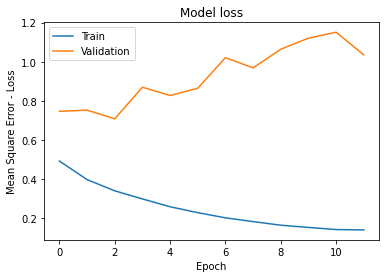

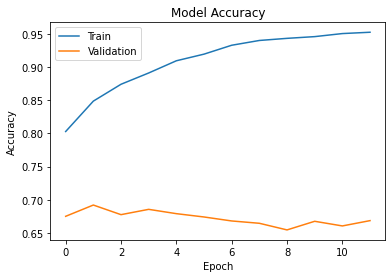

In [43]:

plot_loss(history)

In [44]:
model.evaluate(X_test_pad,y_test)

94/94 [==============================] - 0s 5ms/step - loss: 0.7375 - accuracy: 0.6807


[0.7375167608261108, 0.6806666851043701]